In [1]:
import cv2
import matplotlib.pyplot as plt
import os

def mostrar_y_guardar_imagen_con_bboxes_yolo(ruta_imagen, ruta_txt, ruta_guardado=None):
    # Leer la imagen
    imagen = cv2.imread(ruta_imagen)
    if imagen is None:
        print(f"No se pudo cargar la imagen: {ruta_imagen}")
        return

    alto_img, ancho_img = imagen.shape[:2]

    # Leer anotaciones YOLO
    if not os.path.exists(ruta_txt):
        print(f"No existe el archivo de anotaciones: {ruta_txt}")
        return

    with open(ruta_txt, 'r') as f:
        lineas = f.readlines()

    for linea in lineas:
        partes = linea.strip().split()
        if len(partes) != 5:
            continue

        class_id, x_c, y_c, w, h = map(float, partes)

        x_c *= ancho_img
        y_c *= alto_img
        w *= ancho_img
        h *= alto_img

        x1 = int(x_c - w / 2)
        y1 = int(y_c - h / 2)
        x2 = int(x_c + w / 2)
        y2 = int(y_c + h / 2)

        # Dibujar caja y texto
        cv2.rectangle(imagen, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(imagen, f"ID: {int(class_id)}", (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Mostrar imagen (convertimos BGR a RGB para matplotlib)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Guardar imagen con las detecciones si se indica ruta
    if ruta_guardado:
        cv2.imwrite(ruta_guardado, imagen)
        print(f"Imagen guardada en: {ruta_guardado}")


In [2]:
ruta_actual = os.getcwd()
print(ruta_actual)

/media/roger/Datos/asignaturas_master/tfm/deteccion_caras


In [3]:
ruta_imagen_1 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","images","train","0_Parade_marchingband_1_895.jpg")
ruta_txt_1 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","labels","train","0_Parade_marchingband_1_895.txt")

ruta_imagen_2 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","images","train","2_Demonstration_Demonstrators_2_345.jpg")
ruta_txt_2 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","labels","train","2_Demonstration_Demonstrators_2_345.txt")

ruta_imagen_3 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","images","train","55_Sports_Coach_Trainer_sportcoaching_55_446.jpg")
ruta_txt_3 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","labels","train","55_Sports_Coach_Trainer_sportcoaching_55_446.txt")


ruta_imagen_4 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","images","train","16_Award_Ceremony_Awards_Ceremony_16_539.jpg")
ruta_txt_4 = os.path.join(ruta_actual,"yolov5","datos_deteccion_caras","labels","train","16_Award_Ceremony_Awards_Ceremony_16_539.txt")



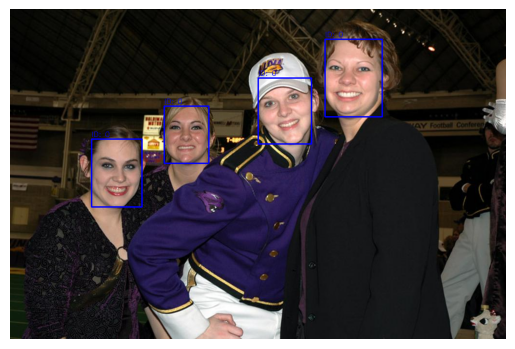

Imagen guardada en: /media/roger/Datos/asignaturas_master/tfm/deteccion_caras/deteccion1.jpg


In [4]:
mostrar_y_guardar_imagen_con_bboxes_yolo(ruta_imagen_1, ruta_txt_1,os.path.join(ruta_actual,"deteccion1.jpg"))


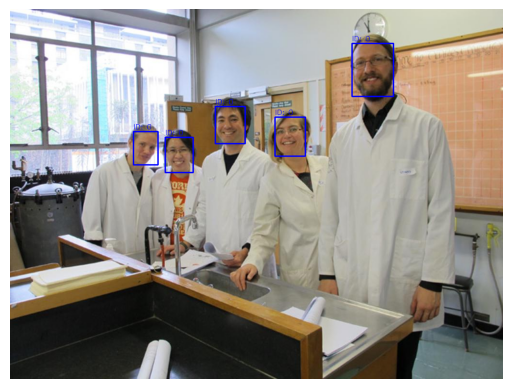

Imagen guardada en: /media/roger/Datos/asignaturas_master/tfm/deteccion_caras/deteccion2.jpg


In [5]:
mostrar_y_guardar_imagen_con_bboxes_yolo(ruta_imagen_2, ruta_txt_2,os.path.join(ruta_actual,"deteccion2.jpg"))

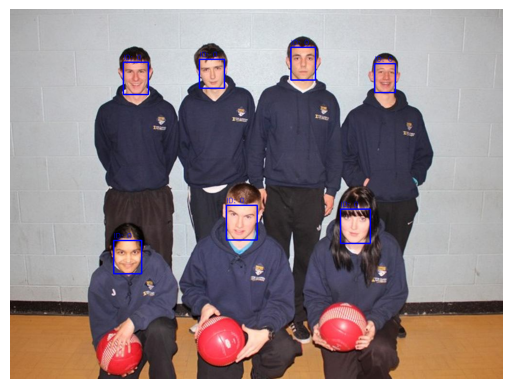

Imagen guardada en: /media/roger/Datos/asignaturas_master/tfm/deteccion_caras/deteccion3.jpg


In [6]:
mostrar_y_guardar_imagen_con_bboxes_yolo(ruta_imagen_3, ruta_txt_3,os.path.join(ruta_actual,"deteccion3.jpg"))

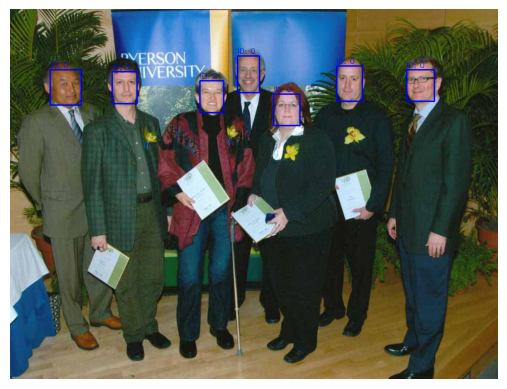

Imagen guardada en: /media/roger/Datos/asignaturas_master/tfm/deteccion_caras/deteccion4.jpg


In [7]:
mostrar_y_guardar_imagen_con_bboxes_yolo(ruta_imagen_4, ruta_txt_4,os.path.join(ruta_actual,"deteccion4.jpg"))